<a href="https://colab.research.google.com/github/Priyo-prog/Time-series-analysis/blob/main/The%20Moving%20Average%20Model/moving_average_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Moving Average Model**

The Moving Average model deals with the residuals of the past lags decided by the ACF.

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Import the Data

In [2]:
## mount the google drive to fetch the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## load the dataset
raw_csv_data = pd.read_csv('/content/drive/MyDrive/Data Science/Time Series/Index2018.csv')
raw_csv_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [4]:
## transforming the dataset
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp = df_comp.asfreq('b') # business days as frequency
df_comp = df_comp.fillna(method='ffill')

In [5]:
df_comp['market_value'] = df_comp.ftse

In [6]:
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

## Splitting the Training and Testing Set

In [7]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The Dicky-Fuller Test

In [8]:
sts.adfuller(df.market_value)

(-1.9041551418836864,
 0.33010893277028336,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '10%': -2.5670769326348926,
  '5%': -2.8621166146845334},
 54854.15304507557)

## The ACF

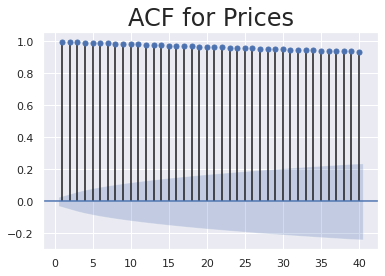

In [9]:
sgt.plot_acf(df.market_value, zero=False, lags=40)
plt.title('ACF for Prices', size=24)
plt.show()

## The PACF

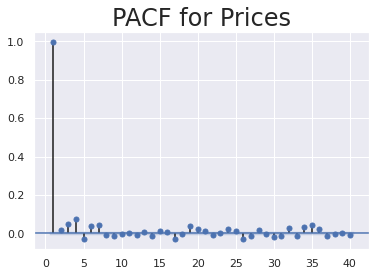

In [10]:
sgt.plot_pacf(df.market_value, zero=False, lags=40, alpha=0.5, method=('ols'))
plt.title('PACF for Prices', size=24)
plt.show()

## Using Returns

returns -> the % change between the values for 2 consecutive periods.

In [11]:
df['returns'] = df.market_value.pct_change(1).mul(100) ## mul 100 used to make it percentage

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
df['returns']

date
1994-01-07         NaN
1994-01-10   -0.156704
1994-01-11   -0.779229
1994-01-12   -1.222988
1994-01-13   -0.356166
                ...   
2013-04-01    0.000000
2013-04-02    1.230867
2013-04-03   -1.084327
2013-04-04   -1.186397
2013-04-05   -1.487049
Freq: B, Name: returns, Length: 5021, dtype: float64

Earlier in the AR model we removed the first column to avoid missing values in the **'returns'** column. This time we are not avoiding the first **date** column.

## MA(1) for Returns

Here the change is going to be in the parameter **order**

First component is for AR model : In this case it will be 0

Second component is for MA model : In this case it will be 1

In [13]:
model_ret_ma_1 = ARMA(df.returns[1:], order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Sat, 30 Jul 2022   AIC                          15865.190
Time:                        04:03:00   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.086      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

## Higher Lag MA Models for Returns

In [14]:
model_ret_ma_2 = ARMA(df.returns[1:], order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Sat, 30 Jul 2022   AIC                          15853.728
Time:                        04:03:00   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

## The Log-Likelihood test

In [15]:
def llr_test(mod_1, mod_2, DF=1):
   """ mod_1, mod_2= models to compare, df=degrees of freedom"""
   L1 = mod_1.fit(trend='ct').llf ## Add trend='ct'
   L2 = mod_2.fit(trend='ct').llf ## log likelihood
   LR = (2*(L2-L1)) ## test statistics
   p = chi2.sf(LR, DF).round(3) ## p-value
   return p

## Compare the Log-Likelihood of the both models

In [16]:
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_1, model_ret_ma_2)))


 LLR test p-value = 0.0


In [17]:
model_ret_ma_3 = ARMA(df.returns[1:], order=(0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_2, model_ret_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 3)   Log Likelihood               -7904.317
Method:                       css-mle   S.D. of innovations              1.168
Date:                Sat, 30 Jul 2022   AIC                          15818.634
Time:                        04:03:00   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0203      0.014     -1.423      0.155      -0.048       0.008
ma.L2.returns    -0.0556      0.013     

We see p-value from LLR test is 0(zero), which means that these lags are significant. And we continue increasing the lags and the complexity till lag 7 where the p-value changes

In [18]:
model_ret_ma_4 = ARMA(df.returns[1:], order=(0,4))
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_3, model_ret_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Sat, 30 Jul 2022   AIC                          15809.547
Time:                        04:03:01   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [19]:
model_ret_ma_5 = ARMA(df.returns[1:], order=(0,5))
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_4, model_ret_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Sat, 30 Jul 2022   AIC                          15799.645
Time:                        04:03:01   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [20]:
model_ret_ma_6 = ARMA(df.returns[1:], order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_5, model_ret_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 30 Jul 2022   AIC                          15794.442
Time:                        04:03:03   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [21]:
model_ret_ma_7 = ARMA(df.returns[1:], order=(0,7))
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_6, model_ret_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Sat, 30 Jul 2022   AIC                          15796.091
Time:                        04:03:05   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In the 7th model the LLR test fails to reject the Null Hypothesis.

However, in the ACF for returns we have seen that 7th model is not significant BUT we need to be troroug and see the LLR test of the 8th model to confirm.

In [22]:
model_ret_ma_8 = ARMA(df.returns[1:], order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print('\n LLR test p-value = ' + str(llr_test(model_ret_ma_7, model_ret_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Sat, 30 Jul 2022   AIC                          15791.205
Time:                        04:03:08   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

Now we have seen that MA(8) is better than MA(7). Now we have to determine whether we should proceed with the MA(8) which gives better result than MA(7) or should we keep it simple with MA(6) model.

For this we need to do a **LLR test** on MA(8) and MA(6) models.

In [23]:
llr_test(model_ret_ma_6, model_ret_ma_8, DF=2)

0.027

In the above LLR test we have included the **DF(Degree of Freedom)** because we need to estimate the coefficients for 8 variables in the complicated model (MA(8)) which is 2 more than the 6 from the simpler model(MA(6)).

The outcome is **0.027** which is lesser than the significance level **0.05(5%)** which concludes that the complicated model is better than the simple one.

## Residuals for Returns

In [24]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
print('The mean of the residual is ' + str(round(df.res_ret_ma_8.mean(),3)) + '\nThe variance of the residual is ' + str(round(df.res_ret_ma_8.var(),3))) 


The mean of the residual is -0.0
The variance of the residual is 1.356


In [26]:
import math

In [28]:
standard_deviation = round(math.sqrt(df.res_ret_ma_8.var()),3)
standard_deviation

1.164

**Gaussian White Noise** implies **Normality**. So we can use **Empirical Rule** (68-95-99.7 rule).

3 standard deviation (3.5 = 3 * 1.164) in either direction

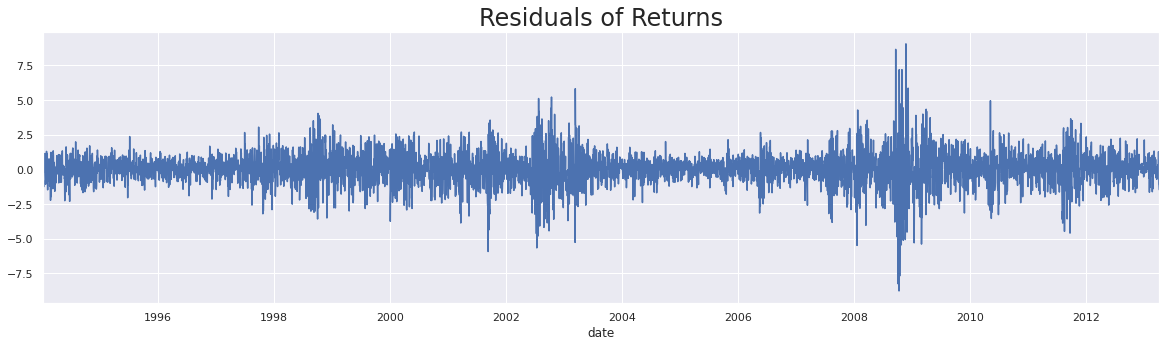

In [30]:
df.res_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Returns", size=24)
plt.show()

To check the **Residual** resembels **White Noise** we can check the **stationarity**. If it is **not** stationary, it cannot be considerd as White Noise.

In [33]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83581758521379,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '10%': -2.567076687880585,
  '5%': -2.8621161549128313},
 15684.052184950395)

In above test we see the p-value is 0(zero), that means it is stationary.

## ACF Residuals for Returns

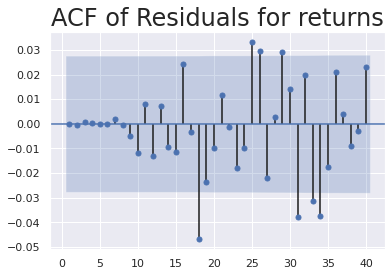

In [35]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero=False, lags=40)
plt.title('ACF of Residuals for returns', size=24)
plt.show()

## Normalized Returns

In [36]:
bench_ret = df.returns.iloc[1]
df['norm_ret'] = df.returns.div(bench_ret).mul(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


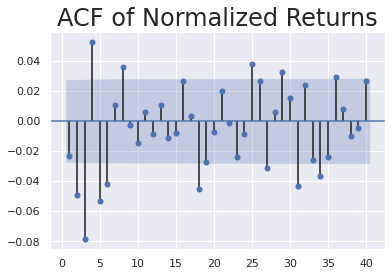

In [37]:
sgt.plot_acf(df.norm_ret[1:], zero=False, lags=40)
plt.title('ACF of Normalized Returns', size=24)
plt.show()

In [39]:
model_norm_ret_ma_8 = ARMA(df.norm_ret[1:], order=(0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
print(results_norm_ret_ma_8.summary())

                              ARMA Model Results                              
Dep. Variable:               norm_ret   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Sat, 30 Jul 2022   AIC                          80635.194
Time:                        05:15:15   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -11.9731      8.846     -1.354      0.176     -29.311       5.364
ma.L1.norm_ret    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_ret    -0.0495      0.014